# Nhận xét: 

    Em tiến hành Standard Scaler thay cho Robust nhưng kết quả không khác biệt 

In [ ]:
!pip install -U scikit-learn

# Part I) Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from numpy import sqrt

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
import time

# Part II) Import Dataset

In [ ]:
dataset = pd.read_csv('avocado.csv')
dataset = dataset.iloc[:, 1:]
dataset

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# Part III) Feature modify

* Note:

    spring (Mar to May)
    
    summer (July to Aug)
    
    fall (Sep to Nov)
    
    winter (Dec to Feb)

In [ ]:
def convert_month(month):
    if month == 3 or month == 4 or month == 5:
        return 0
    elif month == 6 or month == 7 or month == 8:
        return 1
    elif month == 9 or month == 10 or month == 11:
        return 2
    elif month == 12 or month == 1 or month == 2:
        return 3

In [ ]:
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [ ]:
dataset['Month'] = pd.DatetimeIndex(dataset['Date']).month

In [ ]:
dataset['Season'] = dataset['Month'].apply(lambda x: convert_month(x))

In [ ]:
dataset

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Season
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,3
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,3
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,3
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,3
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,3
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,3
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,3
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,3


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
 13  Month         18249 non-null  int64         
 14  Season        18249 non-null  int64         
dtypes: datetime64[ns](1), float64(9), in

# Part III) Encoding Dataset

In [ ]:
df_type = pd.get_dummies(dataset["type"])
df_type

,conventional,organic
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
18244,0,1
18245,0,1
18246,0,1
18247,0,1


In [ ]:
df_region = pd.get_dummies(dataset["region"])
df_region

,Albany,Atlanta,BaltimoreWashington,Boise,Boston,BuffaloRochester,California,Charlotte,Chicago,CincinnatiDayton,...,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
dataset.drop(['type', '4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags'], axis=1, inplace=True)
dataset.drop('region', axis=1, inplace=True)

In [ ]:
dataset = pd.concat([dataset, df_type, df_region], axis="columns")
dataset.head(20)

,Date,AveragePrice,Total Volume,Total Bags,year,Month,Season,conventional,organic,Albany,...,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico
0,2015-12-27,1.33,64236.62,8696.87,2015,12,3,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2015-12-20,1.35,54876.98,9505.56,2015,12,3,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2015-12-13,0.93,118220.22,8145.35,2015,12,3,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2015-12-06,1.08,78992.15,5811.16,2015,12,3,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2015-11-29,1.28,51039.60,6183.95,2015,11,2,1,0,1,...,0,0,0,0,0,0,0,0,0,0
5,2015-11-22,1.26,55979.78,6683.91,2015,11,2,1,0,1,...,0,0,0,0,0,0,0,0,0,0
6,2015-11-15,0.99,83453.76,8318.86,2015,11,2,1,0,1,...,0,0,0,0,0,0,0,0,0,0
7,2015-11-08,0.98,109428.33,6829.22,2015,11,2,1,0,1,...,0,0,0,0,0,0,0,0,0,0
8,2015-11-01,1.02,99811.42,11388.36,2015,11,2,1,0,1,...,0,0,0,0,0,0,0,0,0,0
9,2015-10-25,1.07,74338.76,8625.92,2015,10,2,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 63 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 18249 non-null  datetime64[ns]
 1   AveragePrice         18249 non-null  float64       
 2   Total Volume         18249 non-null  float64       
 3   Total Bags           18249 non-null  float64       
 4   year                 18249 non-null  int64         
 5   Month                18249 non-null  int64         
 6   Season               18249 non-null  int64         
 7   conventional         18249 non-null  uint8         
 8   organic              18249 non-null  uint8         
 9   Albany               18249 non-null  uint8         
 10  Atlanta              18249 non-null  uint8         
 11  BaltimoreWashington  18249 non-null  uint8         
 12  Boise                18249 non-null  uint8         
 13  Boston               18249 non-

# Part IV) Create Independent and Dependent Variable

In [ ]:
X = dataset.iloc[:, 2:].values
X

array([[6.4236620e+04, 8.6968700e+03, 2.0150000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [5.4876980e+04, 9.5055600e+03, 2.0150000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.1822022e+05, 8.1453500e+03, 2.0150000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.3766760e+04, 9.3941100e+03, 2.0180000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.6205220e+04, 1.0969540e+04, 2.0180000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.7489580e+04, 1.2014150e+04, 2.0180000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00]])

In [ ]:
y = dataset.iloc[:, 1].values
y

array([1.33, 1.35, 0.93, ..., 1.87, 1.93, 1.62])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Part V) Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, [0, 1]] = sc.fit_transform(X_train[:, [0, 1]])
X_test[:, [0, 1]] = sc.transform(X_test[:, [0, 1]])

In [ ]:
scaled_df = pd.DataFrame(X_train)
scaled_df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,-0.245397,-0.242629,2017.0,12.0,3.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.139340,-0.091821,2017.0,10.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.242160,-0.242930,2015.0,7.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.083880,-0.173775,2015.0,7.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.243386,-0.241026,2018.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14594,-0.243671,-0.241928,2015.0,2.0,3.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14595,-0.222113,-0.191177,2016.0,2.0,3.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14596,-0.243815,-0.242969,2015.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14597,-0.244969,-0.242876,2015.0,10.0,2.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
scaled_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
count,1.459900e+04,1.459900e+04,14599.000000,14599.000000,14599.000000,14599.000000,14599.000000,14599.000000,14599.000000,14599.000000,...,14599.000000,14599.000000,14599.000000,14599.000000,14599.000000,14599.000000,14599.000000,14599.000000,14599.000000,14599.000000
mean,6.327184e-18,-9.734129e-18,2016.149942,6.143023,1.537023,0.503528,0.496472,0.018563,0.018220,0.018768,...,0.018631,0.018837,0.018015,0.018426,0.018357,0.018563,0.018426,0.018015,0.018768,0.018700
std,1.000034e+00,1.000034e+00,0.943564,3.544342,1.155404,0.500005,0.500005,0.134980,0.133752,0.135711,...,0.135224,0.135953,0.133010,0.134490,0.134245,0.134980,0.134490,0.133010,0.135711,0.135468
min,-2.459011e-01,-2.438958e-01,2015.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-2.426549e-01,-2.384653e-01,2015.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.132846e-01,-2.013712e-01,2016.000000,6.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-1.177301e-01,-1.269891e-01,2017.000000,9.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.814294e+01,1.993055e+01,2018.000000,12.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


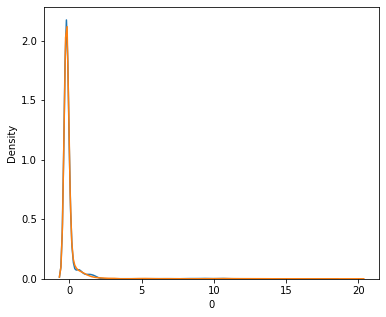

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,5))
sns.kdeplot(scaled_df.iloc[:, 0], ax=ax)


sns.kdeplot(scaled_df.iloc[:, 1], ax=ax)

plt.show()

# Biểu đồ này đang vẽ cái gì vậy? Sao không thấy có nhận xét?

In [ ]:
print("TVol mean: ", dataset['Total Volume'].mean()," - TVol std: ", dataset['Total Volume'].std())
print("TBg mean: ", dataset['Total Bags'].mean()," - TBg std: ", dataset['Total Bags'].std())
print("TVol mean: ", scaled_df.iloc[:, 0].mean()," - TVol std: ", scaled_df.iloc[:, 0].std())
print("TBg mean: ", scaled_df.iloc[:, 1].mean()," - TBg std: ", scaled_df.iloc[:, 1].std())

TVol mean:  850644.0130089321  - TVol std:  3453545.3553994712
TBg mean:  239639.20205983886  - TBg std:  986242.3992164118
TVol mean:  6.327183755655389e-18  - TVol std:  1.0000342506807423
TBg mean:  -9.734128854854445e-18  - TBg std:  1.0000342506807425


# Part V) Training Model Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
start_1 = time.time()

regressor.fit(X_train,y_train)
print(regressor.get_params())

stop_1 = time.time()
regressor_timer = stop_1 - start_1
print(f"Training time:  {stop_1 - start_1} s")

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
Training time: 8.780649900436401s


# Part VI) Testing model

In [ ]:
arr_1 = sc.transform([[109428.33, 6829.22]])

In [ ]:
arr_2 = np.array([[2015, 8, 1, 0.0, 1.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]])
newarr = np.append(arr_1, arr_2 , axis=1) 
newarr

array([[-2.13732729e-01, -2.36784142e-01,  2.01500000e+03,
         8.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  1.00000000e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+0

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([1.7391, 1.0652, 1.3064, ..., 1.8597, 1.7857, 1.7271])

# Part VII) R-Square Validation

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9073312122186901

# Part VIII) MEA, MSE, RMSE Validation

In [ ]:
regressor_mea = mean_absolute_error(y_test, y_pred)
print('MAE: %.3f' % regressor_mea)
print()
regressor_mse = mean_squared_error(y_test, y_pred)
print('MSE: %.3f' % regressor_mse)
print()
regressor_rmse = sqrt(mean_absolute_error(y_test, y_pred))
print('RMSE: %.3f' % regressor_rmse)

MAE: 0.085

MSE: 0.015

RMSE: 0.291


# Part IX) Testing on another Model

## 1) KNeighborsRegressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model_1 = KNeighborsRegressor(n_neighbors=2)

start_2 = time.time()

model_1.fit(X_train,y_train)
print(model_1.get_params())

stop_2 = time.time()
model_1_timer = stop_2 - start_2
print(f"Training time:  {stop_2 - start_2} s")

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}
Training time:  0.23981857299804688 s


In [ ]:
y_pred_1 = model_1.predict(X_test)
y_pred_1
r2_score(y_test, y_pred_1)

0.8568203081191703

In [ ]:
model_1_mea = mean_absolute_error(y_test, y_pred_1)
print('MAE: %.3f' % model_1_mea)
print()
model_1_mse = mean_squared_error(y_test, y_pred_1)
print('MSE: %.3f' % model_1_mse)
print()
model_1_rmse = sqrt(mean_absolute_error(y_test, y_pred_1))
print('RMSE: %.3f' % model_1_rmse)

MAE: 0.102

MSE: 0.023

RMSE: 0.319


## 2) XGBoost

In [ ]:
from xgboost import XGBRegressor

start_3 = time.time()

regressor_1 = XGBRegressor(n_estimators=1000, num_parallel_tree=5)
regressor_1.fit(X_train, y_train)
regressor.fit(X_train,y_train)
print(regressor.get_params())

stop_3 = time.time()
regressor_1_timer = stop_3 - start_3
print(f"Training time:  {stop_3 - start_3} s")

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
Training time:  74.2335524559021 s


In [ ]:
y_pred_2 = regressor_1.predict(X_test)
y_pred_2
r2_score(y_test, y_pred_2)

0.9149072471836319

In [ ]:
regressor_1_mea = mean_absolute_error(y_test, y_pred_2)
print('MAE: %.3f' % regressor_1_mea)
print()
regressor_1_mse = mean_squared_error(y_test, y_pred_2)
print('MSE: %.3f' % regressor_1_mse)
print()
regressor_1_rmse = sqrt(mean_absolute_error(y_test, y_pred_2))
print('RMSE: %.3f' % regressor_1_rmse)

MAE: 0.082

MSE: 0.014

RMSE: 0.286


## 3) XGBoost Posible tunning

In [ ]:
from xgboost import XGBRegressor
regressor_2 = XGBRegressor(n_estimators=100, 
                           max_depth= 10, 
                           learning_rate= 0.3, 
                           num_parallel_tree=5, 
                           colsample_bytree=1, 
                           subsample= 0.6)

start_4 = time.time()

regressor_2.fit(X_train, y_train)

stop_4 = time.time()
regressor_2_timer = stop_4 - start_4
print(f"Training time:  {stop_4 - start_4} s")

Training time:  13.328034400939941 s


In [ ]:
y_pred_3 = regressor_2.predict(X_test)
y_pred_3
r2_score(y_test, y_pred_3)

0.9252991614550584

In [ ]:
regressor_2_mea = mean_absolute_error(y_test, y_pred_3)
print('MAE: %.3f' % regressor_2_mea)
print()
regressor_2_mse = mean_squared_error(y_test, y_pred_3)
print('MSE: %.3f' % regressor_2_mse)
print()
regressor_2_rmse = sqrt(mean_absolute_error(y_test, y_pred_3))
print('RMSE: %.3f' % regressor_2_rmse)


MAE: 0.077

MSE: 0.012

RMSE: 0.277


# Kết luận:

    Với model: XGBRegressor(n_estimators=100, 
                           max_depth= 10, 
                           learning_rate= 0.3, 
                           num_parallel_tree=5, 
                           colsample_bytree=1, 
                           subsample= 0.6)

Sẽ cho kết quả có R-square score (0.92) cao nhất và chỉ số MAE: 0.077, MSE: 0.012, RMSE: 0.277 thấp nhất trong các model

# Chú ý: bài toán phân loại thì mới đánh giá tiêu chí accuracy, còn bài toán regression thì không. Nó được đánh giá bằng gì?

bài toán Regression thường được đánh giá bằng: R_quare, MSE(mean squared error), RMSE (root-mean-square error) or MAE (mean absolute error)

# Làm bảng thống kê kết quả cho các thuật toán trên: tên thuật toán, thời gian thực hiện, score train, score test, rmse....

In [ ]:
test_result = {'tên thuật toán':['RandomForestRegressor', 'KNeighborsRegressor', 'XGBRegressor_1000_tree', 'XGBRegressor_100_tree'],
               'thời gian':[regressor_timer, model_1_timer, regressor_1_timer, regressor_2_timer],
               'R-square':[r2_score(y_test, y_pred), r2_score(y_test, y_pred_1), r2_score(y_test, y_pred_2), r2_score(y_test, y_pred_3)],
               'MAE':[regressor_mea, model_1_mea, regressor_1_mea, regressor_2_mea],
               'MSE':[regressor_mse, model_1_mse, regressor_1_mse, regressor_2_mse],
               'RMSE':[regressor_rmse, model_1_rmse, regressor_1_rmse, regressor_2_rmse],
               'score train':[regressor.score(X_train, y_train), model_1.score(X_train, y_train), regressor_1.score(X_train, y_train), regressor_2.score(X_train, y_train)],
               'score test':[regressor.score(X_test, y_test), model_1.score(X_test, y_test), regressor_1.score(X_test, y_test), regressor_2.score(X_test, y_test)],}
df_result = pd.DataFrame(test_result)

In [ ]:
df_result

,tên thuật toán,thời gian,R-square,MAE,MSE,RMSE,score train,score test
0,RandomForestRegressor,8.780650,0.907331,0.084539,0.015095,0.290756,0.987341,0.907331
1,KNeighborsRegressor,0.239819,0.856820,0.101725,0.023322,0.318943,0.967875,0.856820
2,XGBRegressor_1000_tree,74.233552,0.914907,0.081769,0.013860,0.285953,0.997517,0.914907
3,XGBRegressor_100_tree,13.328034,0.925299,0.076520,0.012168,0.276623,0.988396,0.925299
